# Рубежный контроль №2
## Терентьев В.О. Группа ИУ5-63Б
### Вариант 20
**Задача**. Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

**Методы для ИУ5-63Б.** Метод №1: "Дерево решений". Метод №2: "Случайный лес".

**Набор данных:** [Trump Impeachment Polls](https://www.kaggle.com/fmejia21/trump-impeachment-polls).

## Импорт библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка и первичная подготовка данных:

In [2]:
# загрузка набора данных (файл: impeachment-polls.csv)
data = pd.read_csv('impeachment-polls.csv', sep=",")
# размер набора данных
data.shape

(542, 24)

In [3]:
# первые 5 строк набора данных
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


In [4]:
# уникальные значения столбца 'Category' файла impeachment-polls
data['Category'].unique()

array(['begin_proceedings', 'begin_inquiry', 'impeach_and_remove',
       'reasons', 'impeach', 'consider', 'if_impeach_then_remove',
       'remove', nan], dtype=object)

In [5]:
# загрузка набора данных (файл: impeachment_topline.csv)
data2 = pd.read_csv('impeachment_topline.csv', sep=",")
# размер набора данных
data2.shape

(7580, 8)

In [6]:
# первые 5 строк набора данных
data2.head()

,president,subgroup,party,category_group,modeldate,yes_estimate,no_estimate,timestamp
0,Donald Trump,All polls,rep,remove,2/4/2020,9.169278,86.625773,09:10:39 4 Feb 2020
1,Donald Trump,All polls,rep,impeach,2/4/2020,13.207482,84.239974,09:10:38 4 Feb 2020
2,Donald Trump,All polls,rep,begin,2/4/2020,14.471712,82.718082,09:10:35 4 Feb 2020
3,Donald Trump,All polls,rep,all,2/4/2020,13.028150,84.507971,09:10:34 4 Feb 2020
4,Donald Trump,All polls,ind,remove,2/4/2020,43.181777,45.723249,09:10:30 4 Feb 2020


In [7]:
# уникальные значения столбца 'category_group' файла impeachment_topline
data2['category_group'].unique()

array(['remove', 'impeach', 'begin', 'all', nan], dtype=object)

In [8]:
# объединение файлов в один набор данных
for index, row in data.iterrows():
    try:
        if (row['Category'] == 'begin_proceedings') or (row['Category'] == 'begin_inquiry') or (row['Category'] == 'reasons') or (row['Category'] == 'consider'):
            data.at[index, 'real_yes_estimate'] = data2.loc[(data2['modeldate'] == row['End']) & (data2['party'] == 'all') & (data2['category_group'] == 'begin'), 'yes_estimate'].values[0]
        elif row['Category'] == 'impeach':
            data.at[index, 'real_yes_estimate'] = data2.loc[(data2['modeldate'] == row['End']) & (data2['party'] == 'all') & (data2['category_group'] == 'impeach'), 'yes_estimate'].values[0]
        elif (row['Category'] == 'impeach_and_remove') or (row['Category'] == 'remove'):
            data.at[index, 'real_yes_estimate'] = data2.loc[(data2['modeldate'] == row['End']) & (data2['party'] == 'all') & (data2['category_group'] == 'remove'), 'yes_estimate'].values[0]
        elif row['Category'] == 'if_impeach_then_remove':
            data.at[index, 'real_yes_estimate'] = data2.loc[(data2['modeldate'] == row['End']) & (data2['party'] == 'all') & (data2['category_group'] == 'all'), 'yes_estimate'].values[0]
        else:
            data.at[index, 'real_yes_estimate'] = np.nan
    except IndexError:
        data.at[index, 'real_yes_estimate'] = np.nan
# удаление ненужного в дальнейшем датасета
del data2
# первые 5 строк итогового набора данных
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes,real_yes_estimate
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,87.0,292.0,61.0,36.0,373.0,37.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN,35.79057
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,87.0,290.0,62.0,29.0,360.0,36.0,59.0,https://games-cdn.washingtonpost.com/notes/pro...,NaN,35.27876
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,90.0,320.0,64.0,30.0,370.0,42.0,53.0,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN,38.46307
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,82.0,331.0,75.0,21.0,371.0,49.0,46.0,https://www.langerresearch.com/wp-content/uplo...,NaN,46.47317
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,93.0,577.0,77.0,15.0,499.0,41.0,53.0,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN,36.11217


In [9]:
# список колонок с типами данных
data.dtypes

Start                 object
End                   object
Pollster              object
Sponsor               object
SampleSize             int64
Pop                   object
tracking              object
Text                  object
Category              object
Include?              object
Yes                  float64
No                   float64
Unsure               float64
Rep Sample           float64
Rep Yes              float64
Rep No               float64
Dem Sample           float64
Dem Yes              float64
Dem No               float64
Ind Sample           float64
Ind Yes              float64
Ind No               float64
URL                   object
Notes                 object
real_yes_estimate    float64
dtype: object

In [10]:
# удаление лишних колонок
data.drop(['Start', 'End', 'Text', 'URL', 'Notes'], inplace=True, axis=1)

## Обработка пропусков в данных:

In [11]:
# проверим, есть ли пропущенные значения
data.isnull().sum()

Pollster               0
Sponsor              266
SampleSize             0
Pop                    0
tracking             428
Category               1
Include?               0
Yes                    0
No                     0
Unsure                21
Rep Sample            67
Rep Yes               33
Rep No                50
Dem Sample            65
Dem Yes               27
Dem No                51
Ind Sample           133
Ind Yes               95
Ind No               112
real_yes_estimate     45
dtype: int64

In [12]:
# удаление колонок с большим количеством пропущенных значений
data.drop(['Sponsor', 'tracking'], inplace=True, axis=1)

In [13]:
# заполнение колонки с малым количеством пропущенных значений нулями, логически не противоречащих датасету
data['Unsure'].fillna(0, inplace=True)

In [14]:
# удаление строк, содержащих пустые значения в колонке целевого признака
data.dropna(axis=0, subset=['real_yes_estimate'], inplace=True)
# размер данных
data.shape

(497, 18)

### "Внедрение значений" - импьютация (imputation)

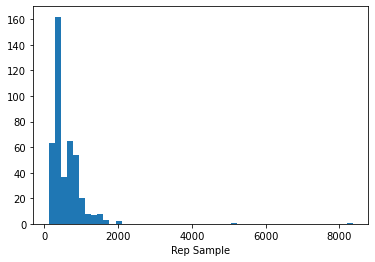

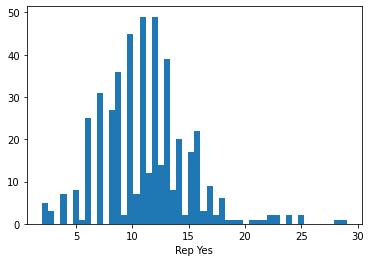

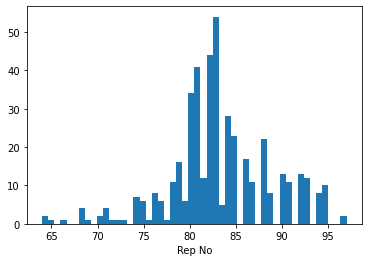

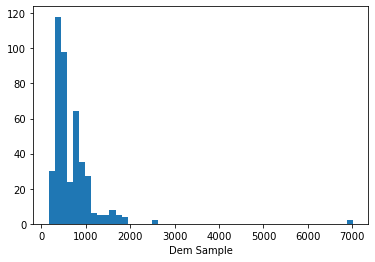

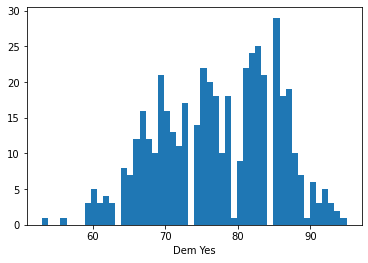

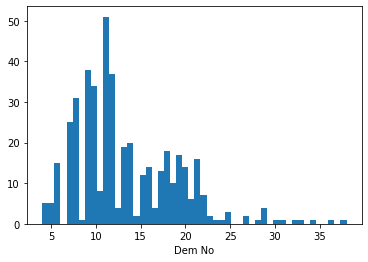

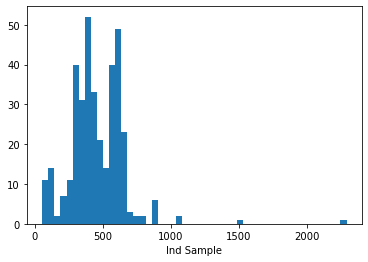

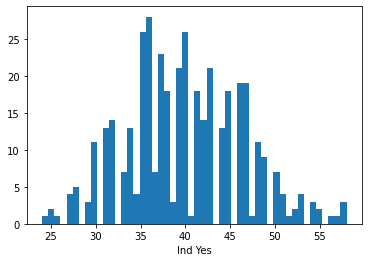

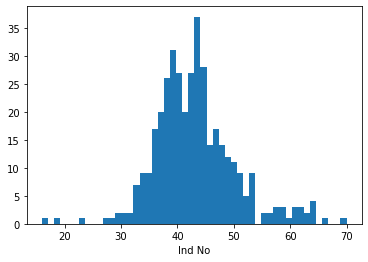

In [15]:
# список колонок с числовыми данными
num_cols = ['Rep Sample', 'Rep Yes', 'Rep No', 'Dem Sample', 'Dem Yes', 'Dem No', 'Ind Sample', 'Ind Yes', 'Ind No']
# Гистограмма по признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
# Импьютация столбцов стратегией 'медиана'
imp_med = SimpleImputer(missing_values=np.nan, strategy='median')
data.loc[:, 'Rep Yes'] = imp_med.fit_transform(data[['Rep Yes']])
data.loc[:, 'Rep No'] = imp_med.fit_transform(data[['Rep No']])
data.loc[:, 'Dem Yes'] = imp_med.fit_transform(data[['Dem Yes']])
data.loc[:, 'Dem No'] = imp_med.fit_transform(data[['Dem No']])
data.loc[:, 'Ind Yes'] = imp_med.fit_transform(data[['Ind Yes']])
data.loc[:, 'Ind No'] = imp_med.fit_transform(data[['Ind No']])

In [18]:
# Импьютация остальных столбцов стратегией 'мода'
imp_mod = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
data.loc[:, 'Rep Sample'] = imp_mod.fit_transform(data[['Rep Sample']])
data.loc[:, 'Dem Sample'] = imp_mod.fit_transform(data[['Dem Sample']])
data.loc[:, 'Ind Sample'] = imp_mod.fit_transform(data[['Ind Sample']])

In [19]:
# проверим, есть ли пропущенные значения
data.isnull().sum()

Pollster             0
SampleSize           0
Pop                  0
Category             0
Include?             0
Yes                  0
No                   0
Unsure               0
Rep Sample           0
Rep Yes              0
Rep No               0
Dem Sample           0
Dem Yes              0
Dem No               0
Ind Sample           0
Ind Yes              0
Ind No               0
real_yes_estimate    0
dtype: int64

## Масштабирование данных:
### MinMax масштабирование

In [20]:
from sklearn.preprocessing import MinMaxScaler

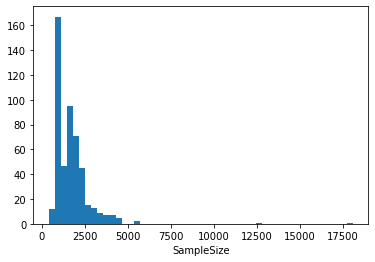

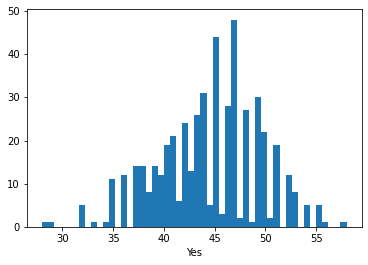

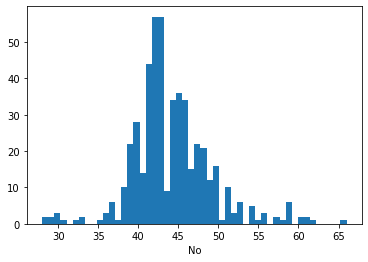

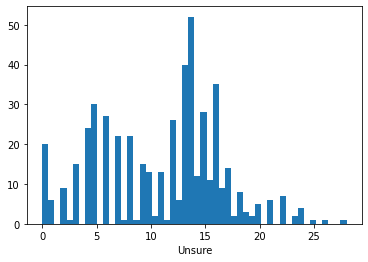

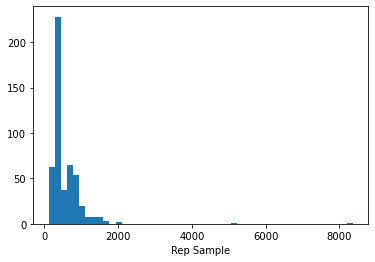

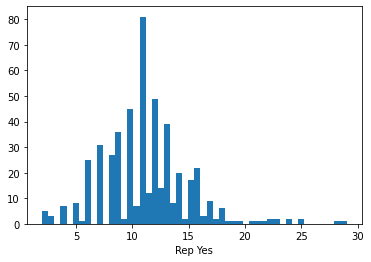

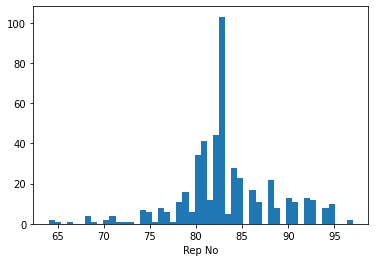

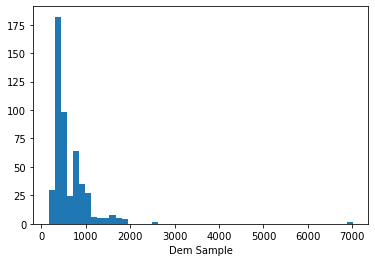

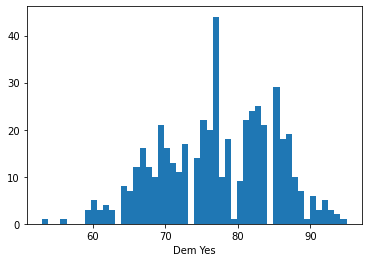

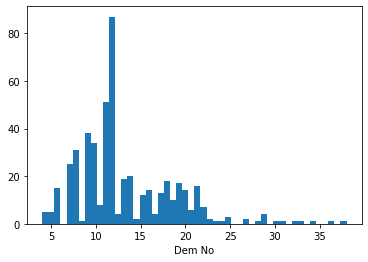

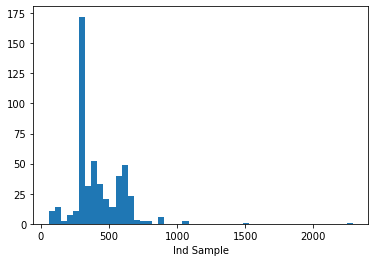

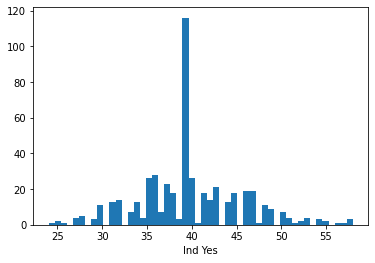

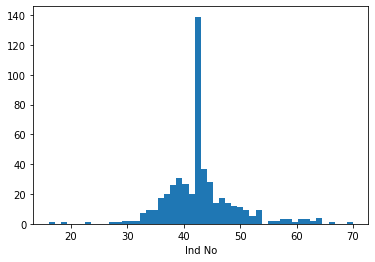

In [21]:
# список колонок с числовыми данными
num_cols = ['SampleSize', 'Yes', 'No', 'Unsure', 'Rep Sample', 'Rep Yes', 'Rep No', 'Dem Sample', 'Dem Yes', 'Dem No', 'Ind Sample', 'Ind Yes', 'Ind No']
# Гистограмма по признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [22]:
# MinMax масштабирование
sc1 = MinMaxScaler()
for item in num_cols:
    data.loc[:, item] = sc1.fit_transform(data[[item]])

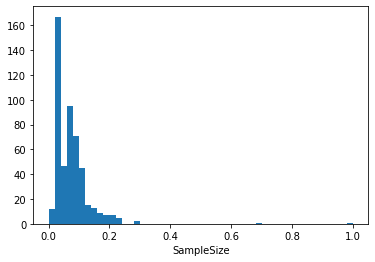

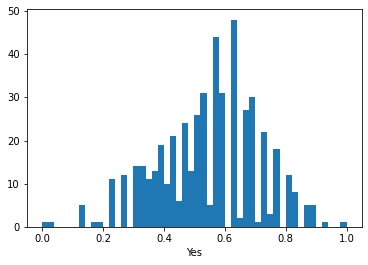

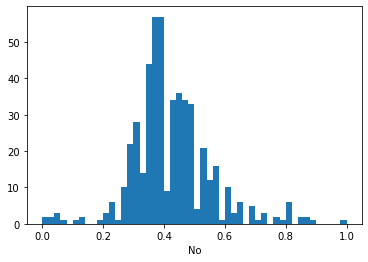

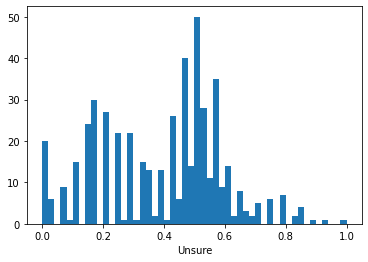

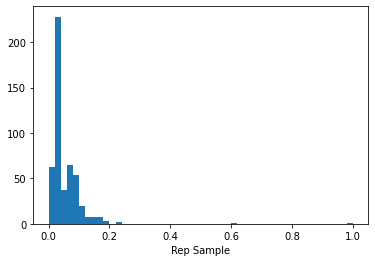

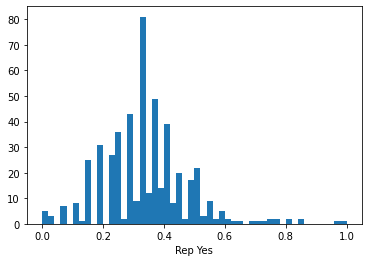

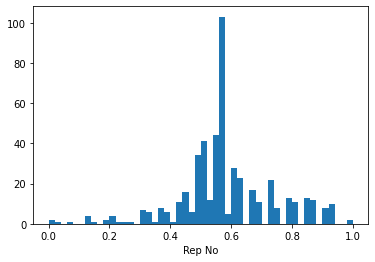

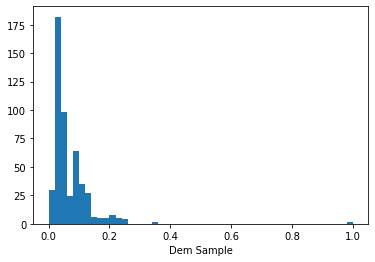

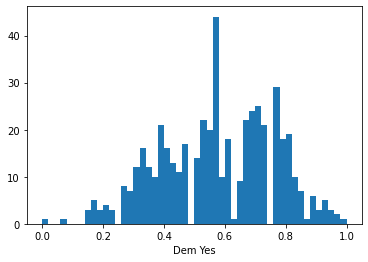

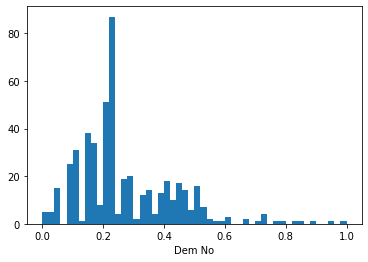

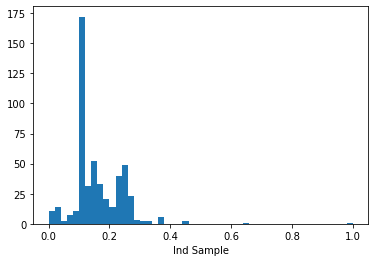

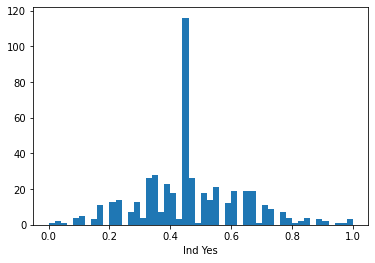

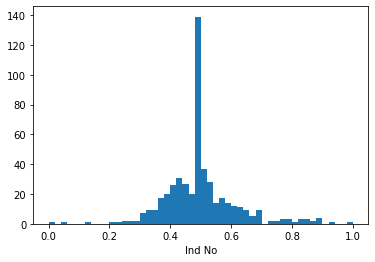

In [23]:
# Гистограмма по отмасштабированным признакам
for col in data[num_cols]:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

## Кодирование категориальных признаков:

In [24]:
# Выберем категориальные колонки
# Цикл по колонкам датасета
for col in data.columns:
    dt = str(data[col].dtype)
    if dt=='object':
        temp_un = data[col].nunique()
        print('Колонка {}. Тип данных {}. Количество уникальных значений {}.'.format(col, dt, temp_un))

Колонка Pollster. Тип данных object. Количество уникальных значений 35.
Колонка Pop. Тип данных object. Количество уникальных значений 3.
Колонка Category. Тип данных object. Количество уникальных значений 8.
Колонка Include?. Тип данных object. Количество уникальных значений 2.


### Кодирование категорий целочисленными значениями - label encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
data.loc[:, 'Pollster'] = le.fit_transform(data['Pollster'])
data['Pollster'].head()

0    0
1    0
2    0
3    0
4    6
Name: Pollster, dtype: int32

### Кодирование категорий наборами бинарных значений - one-hot encoding

In [27]:
cat_cols = ['Pop', 'Category', 'Include?']
one_hot = pd.get_dummies(data[cat_cols].astype(str))
one_hot.head()

,Pop_a,Pop_lv,Pop_rv,Category_begin_inquiry,Category_begin_proceedings,Category_consider,Category_if_impeach_then_remove,Category_impeach,Category_impeach_and_remove,Category_reasons,Category_remove,Include?_no,Include?_yes
0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,0,0,1


In [28]:
# Замена исходных категориальных колонок наборами бинарных значений
data = data.join(one_hot)
data.drop(columns=cat_cols, inplace=True)

In [29]:
# первые 5 строк получившегося набора данных
data.head()

,Pollster,SampleSize,Yes,No,Unsure,Rep Sample,Rep Yes,Rep No,Dem Sample,Dem Yes,...,Category_begin_inquiry,Category_begin_proceedings,Category_consider,Category_if_impeach_then_remove,Category_impeach,Category_impeach_and_remove,Category_reasons,Category_remove,Include?_no,Include?_yes
0,0,0.034294,0.3,0.815789,0.142857,0.014654,0.185185,0.696970,0.018689,0.190476,...,0,1,0,0,0,0,0,0,0,1
1,0,0.033898,0.3,0.736842,0.214286,0.018045,0.296296,0.696970,0.018397,0.214286,...,0,1,0,0,0,0,0,0,0,1
2,0,0.033898,0.4,0.710526,0.214286,0.015623,0.185185,0.787879,0.022777,0.261905,...,0,1,0,0,0,0,0,0,0,1
3,0,0.034011,0.7,0.473684,0.178571,0.016955,0.481481,0.545455,0.024383,0.523810,...,0,1,0,0,0,0,0,0,0,1
4,6,0.065424,0.5,0.605263,0.178571,0.045053,0.111111,0.878788,0.060301,0.571429,...,1,0,0,0,0,0,0,0,0,1


## Построение моделей:
### Разделение выборки на обучающую и тестовую

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
data_train, data_test, data_y_train, data_y_test = train_test_split(data[data.columns.drop('real_yes_estimate')], data['real_yes_estimate'], random_state=1)

### Модель "Дерево решений"

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtc = DecisionTreeRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_dtc = dtc.predict(data_test)

### Модель "Случайный лес"

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
RF = RandomForestRegressor(random_state=1).fit(data_train, data_y_train)
data_test_predicted_rf = RF.predict(data_test)

## Оценка качества моделей:
В качестве метрик для оценки качества моделей я использую **Mean squared error** (средняя квадратичная ошибка), как наиболее часто используемую метрику для оценки качества регрессии, и **метрику $R^2$** (коэффициент детерминации), потому что эта метрика является нормированной.

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# Mean squared error - средняя квадратичная ошибка
print('Метрика MSE:\nДерево решений: {}\nСлучайный лес: {}'.format(mean_squared_error(data_y_test, data_test_predicted_dtc), mean_squared_error(data_y_test, data_test_predicted_rf)))

Метрика MSE:
Дерево решений: 7.644969145389171
Случайный лес: 3.714740789719621


In [38]:
# 4) Метрика R2 или коэффициент детерминации
print('Метрика R\u00B2:\nДерево решений: {}\nСлучайный лес: {}'.format(r2_score(data_y_test, data_test_predicted_dtc), r2_score(data_y_test, data_test_predicted_rf)))

Метрика R²:
Дерево решений: 0.6453846612213481
Случайный лес: 0.8276900745353836


## Выводы о качестве построенных моделей:
Исходя из оценки качества построенных моделей можно увидеть, что модель "Случайный лес" лучше справляется с задачей по сравнению с моделью "Дерево решений", что может свидетельствовать о переобучении модели "Дерево решений".